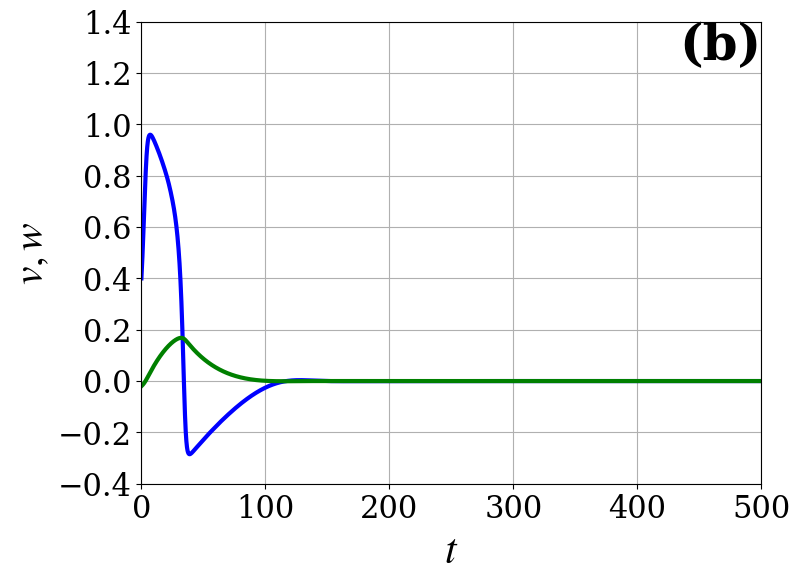

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'   
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42
mpl.rcParams['text.usetex']  = False

# Parameters
epsilon = 0.01
a = 0.1
b = 1
c = 2

def system(t, y):
    v, w = y
    dv_dt = v * (a - v) * (v - 1) - w
    dw_dt = epsilon * (b * v - c * w)
    return [dv_dt, dw_dt]

t_start, t_end = 0, 500
t_eval = np.linspace(t_start, t_end, 10001)

y0_1 = [0.4, -0.02]   

sol1 = solve_ivp(system, (t_start, t_end), y0_1, t_eval=t_eval, method='RK45')
sol2 = solve_ivp(system, (t_start, t_end), y0_2, t_eval=t_eval, method='RK45')

v1, w1 = sol1.y[0], sol1.y[1]
v2, w2 = sol2.y[0], sol2.y[1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sol1.t, v1, linewidth=3.0, color='blue')
ax.plot(sol1.t, w1, linewidth=3.0, color='green')
ax.set_xlabel('$t$', fontsize=30)
ax.set_ylabel('$v,w$', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.grid(True)
ax.text(1, 1, '(b)', transform=ax.transAxes, fontsize=36, fontweight='bold', va='top', ha='right')
ax.set_xlim(0, 500)
ax.set_ylim(-0.4, 1.4)

plt.savefig('time_v_w.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()
